<a href="https://colab.research.google.com/github/KiarashVaziri/Introduction-to-Machine-Learning/blob/main/CHW198102562.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to Machine Learning <br />
##Computer Homework 1 <br/>
*Name: Kiarash Vaziri* <br/>
*Student Number: 98102562* <br/>


# C1

## a) Loading training and validation set
First we must read the data from an excell file. Using following operation from pandas library, we achieve that.


```
dataSet = pandas.read_csv(r"Q1_data.csv")
```

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive 
drive.mount('/media/gdrive', force_remount=True)
dataSet = pd.read_csv(r"/media/gdrive/MyDrive/MachineLearning/Q1_data.csv")
print(type(dataSet))

Mounted at /media/gdrive
<class 'pandas.core.frame.DataFrame'>


In [ ]:

xt = dataSet.loc[0:400, 'GRE Score':'Research']
yt = dataSet.loc[0:400, 'Chance of Admit ']

xv = dataSet.loc[401:502, "GRE Score":"Research"]
yv = dataSet.loc[401:502, 'Chance of Admit ']

## b) Finding optimal w vector
Since m=400 and d+1=8, we have m>d+1, therefore matrix A can be invertible.<br />
The Linear Algebra module of NumPy offers various methods including inverse matrix.<br />
Also, to make training set of x homogenous, we add a row of ones on the top.


In [ ]:
onez401 = np.ones(401)
onezMat401 = np.matrix(onez401)
xtHomogenous = np.concatenate((onezMat401, np.transpose(xt)))

onez101 = np.ones(101)
onezMat101 = np.matrix(onez101)
xvHomogenous = np.concatenate((onezMat101, np.transpose(xv)))

A = np.matmul(xtHomogenous, np.transpose(xtHomogenous))
beta = np.matmul(xtHomogenous, yt)
wMat = np.matmul(np.linalg.inv(A), beta)
w = np.array(np.transpose(wMat))

print('Constant Coef.: ', w[0])
print('GRE Score Coef.: ', w[1])
print('TOEFL Score Coef.: ', w[2])
print('University Coef.: ', w[3])
print('SOP Coef.: ', w[4])
print('LOR Coef.: ', w[5])
print('CGPA Coef.: ', w[6])
print('Research Coef.: ', w[7])


Constant Coef.:  [-1.14472436]
GRE Score Coef.:  [0.0013133]
TOEFL Score Coef.:  [0.00248072]
University Coef.:  [0.00601382]
SOP Coef.:  [0.00369101]
LOR Coef.:  [0.01623394]
CGPA Coef.:  [0.12615557]
Research Coef.:  [0.02361233]


## c) Calculating empirical and true risk

In [ ]:
# Empirical Risk Error
yhat = np.matmul(np.transpose(xtHomogenous), w)
ERt = 0
for i in range(401):
    ERt += (float(yhat[i]) - yt[i]) ** 2
ERt = ERt / 401
print("Empirical Risk Error:{0:5f}".format(ERt))

# True Risk Error
yhatValidation = np.matmul(np.transpose(xvHomogenous), w)

ERv = 0
for i in range(1, 101):
    ERv += (float(yhatValidation[i]) - yv[i + 401]) ** 2
ERv = ERv / 101
print("True Risk Error:{0:5f}\n".format(ERv))


Empirical Risk Error:0.003478
True Risk Error:0.003829



## d) Choosing one of the features
Based on the results shown in the figure, I pick CGPA, since it is very close to a linear estimation of admission chance and the variance of data is not wide.

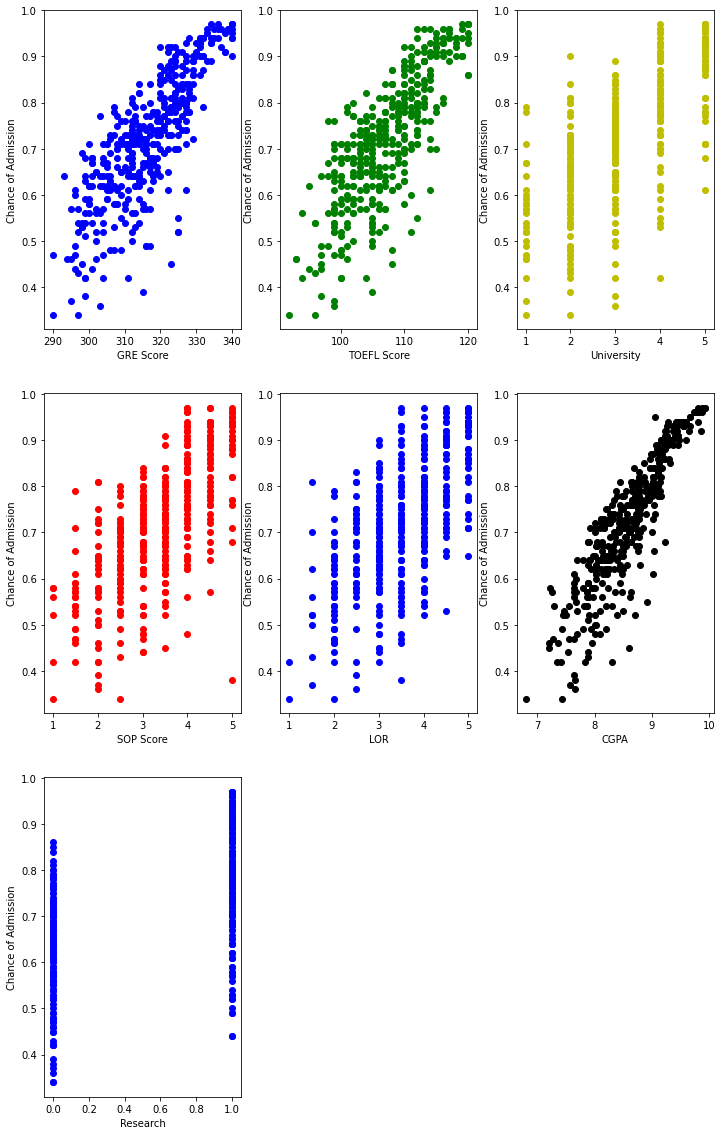

In [ ]:
# d
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 20))

plt.subplot(3, 3, 1)
plt.scatter(dataSet.loc[0:401, 'GRE Score'], dataSet.loc[0:401, 'Chance of Admit '], c='b')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")

plt.subplot(3, 3, 2)
plt.scatter(dataSet.loc[0:401, 'TOEFL Score'], dataSet.loc[0:401, 'Chance of Admit '], c='g')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")

plt.subplot(3, 3, 3)
plt.scatter(dataSet.loc[0:401, 'University Rating'], dataSet.loc[0:401, 'Chance of Admit '], c='y')
plt.xlabel("University")
plt.ylabel("Chance of Admission")

plt.subplot(3, 3, 4)
plt.scatter(dataSet.loc[0:401, 'SOP'], dataSet.loc[0:401, 'Chance of Admit '], c='r')
plt.xlabel("SOP Score")
plt.ylabel("Chance of Admission")

plt.subplot(3, 3, 5)
plt.scatter(dataSet.loc[0:401, 'LOR '], dataSet.loc[0:401, 'Chance of Admit '], c='b')
plt.xlabel("LOR")
plt.ylabel("Chance of Admission")

plt.subplot(3, 3, 6)
plt.scatter(dataSet.loc[0:401, 'CGPA'], dataSet.loc[0:401, 'Chance of Admit '], c='k')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")

plt.subplot(3, 3, 7)
plt.scatter(dataSet.loc[0:401, 'Research'], dataSet.loc[0:401, 'Chance of Admit '], c='b')
plt.xlabel("Research")
plt.ylabel("Chance of Admission")

plt.show()

## e) Linear regression with one feature

In [ ]:
# one feature selection
xtOneF = np.matrix(dataSet.loc[0:400, 'CGPA'])
ytOneF = np.matrix(dataSet.loc[0:400, 'Chance of Admit '])

xvOneF = np.matrix(dataSet.loc[401:502, "CGPA"])
yvOneF = np.matrix(dataSet.loc[401:502, "Chance of Admit "])

onez401 = np.ones(401)
onezMat401 = np.matrix(onez401)
xtOneFHomogenous = np.concatenate((onezMat401, xtOneF))

A = np.matmul(xtOneFHomogenous, np.transpose(xtOneFHomogenous))
beta = np.matmul(xtOneFHomogenous, np.transpose(ytOneF))
wMat = np.matmul(np.linalg.inv(A), beta)
wOneF = np.array(np.transpose(wMat))
print('Constant Coef. for one feature: ', wOneF[0][0])
print('CGPA Score Coef. for one feature: ', wOneF[0][1])


Constant Coef. for one feature:  -1.0427895990500715
CGPA Score Coef. for one feature:  0.20535552444935878


## f) Empirical and True risk error of one-feature implementation

In [ ]:
onez101 = np.ones(101)
onezMat101 = np.matrix(onez101)
xvOneFHomogenous = np.concatenate((onezMat101, xvOneF))

# Empirical Risk Error
yhatOneF = np.matmul(wOneF, xtOneFHomogenous)

ERt = 0
for i in range(401):
    ERt += (float(yhatOneF[0, i]) - ytOneF[0, i]) ** 2
ERt = ERt / 401
print("Empirical Risk Error:{0:5f}".format(ERt))

# True Risk Error
yhatValidationOneF = np.matmul(wOneF, xvOneFHomogenous)
ERv = 0
for i in range(1, 101):
    ERv += (float(yhatValidationOneF[0, i]) - yvOneF[0, i]) ** 2
ERv = ERv / 101
print("True Risk Error:{0:5f}".format(ERv))

Empirical Risk Error:0.004140
True Risk Error:0.005371


## g) Comparision of 7-feature vs 1-feature regression
The empirical error of 7-feature method is 0.003478 while the empirical error of 1-feature method is 0.004140. As we can see, 7-feature method has a less eprical error which means 6 more features improve accuracy of the regression, eventhough the difference between two methods' errors is not substantial.
Same conclusion implies from true risk comparision.

# C2

## a & b) Finding an optimal n ranging from 1 to 15

In [ ]:
from google.colab import drive 
drive.mount('/media/gdrive', force_remount=True)
trainData = np.load("/media/gdrive/MyDrive/MachineLearning/train_data.npy")
validationData = np.load("/media/gdrive/MyDrive/MachineLearning/validation_data.npy")
testData = np.load("/media/gdrive/MyDrive/MachineLearning/test_data.npy")

Mounted at /media/gdrive


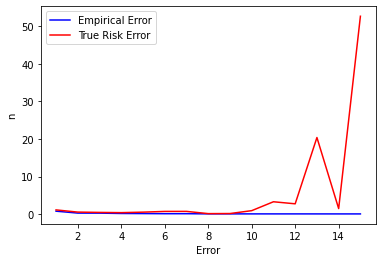

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

optimalN = 1
maxN = 15

xTraining = trainData[:, 0]
yTraining = trainData[:, 1]
trainDataLength = len(trainData)
ERVector = [0 for i in range(maxN)]

xValidation = validationData[:, 0]
yValidation = validationData[:, 1]
validationDataLength = len(validationData)
TRVector = [0 for i in range(maxN)]

xTest = testData[:, 0]
yTest = testData[:, 1]
testDataLength = len(testData)

for n in range(1, maxN + 1):
    X = [[xTraining[i] ** j for i in range(trainDataLength)] for j in range(n + 1)]
    A = np.matmul(X, np.transpose(X))
    beta = np.matmul(X, yTraining)
    wVector = np.matmul(np.linalg.inv(A), beta)
    # Empirical Risk
    yhat = np.matmul(wVector, X)
    EmpiricalErrorN = 0
    for i in range(len(yTraining)):
        EmpiricalErrorN += (yhat[i] - yTraining[i]) ** 2
    ERVector[n - 1] = EmpiricalErrorN / len(yTraining)
    # True Risk
    X = [[xValidation[i] ** j for i in range(validationDataLength)] for j in range(n + 1)]
    yhatTrue = np.matmul(wVector, X)
    TrueErrorN = 0
    for i in range(len(yValidation)):
        TrueErrorN += (yhatTrue[i] - yValidation[i]) ** 2
    TRVector[n - 1] = TrueErrorN / len(yValidation)

n_axis = [t for t in range(1, maxN + 1)]
plt.figure()
plt.plot(n_axis, ERVector, c='b', label='Empirical Error')
plt.plot(n_axis, TRVector, c='r', label='True Risk Error')
plt.xlabel("Error")
plt.ylabel("n")
plt.legend()
plt.show()

## c) 
As shown in figure above, empirical error decreases as n grows. The reason behind that is because the estimation function, h, is being optimized for the training data and the empirical error drops since it is learning a specific set of data. However, from n=9 onwards, true risk starts to rise because due to overfitting.  

## d)
Therefore, by considering the fact that after some point h starts to memorize training data and overfitting occurs, true risk minimization is the way to find the optimal n since it relates to any unexpected set of data. As a result, **the optimal n is 9**.

## e)

In [ ]:
optimalN = 9
n = optimalN
X = [[xTraining[i] ** j for i in range(trainDataLength)] for j in range(n + 1)]
A = np.matmul(X, np.transpose(X))
beta = np.matmul(X, yTraining)
wVector = np.matmul(np.linalg.inv(A), beta)

# Test Risk (estimated risk)
X = [[xTest[i] ** j for i in range(testDataLength)] for j in range(n + 1)]
yhatTest = np.matmul(wVector, X)
TestErrorN = 0
for i in range(len(yTest)):
    TestErrorN += (yhatTest[i] - yTest[i]) ** 2
TestErrorN = TestErrorN / len(yTest)
print("L_testRisk is ", TestErrorN)

L_testRisk is  0.11814494602167018


## f)  Why to choose Test data over Validation data
Since we have already used validation data set for finding the best degree of out polynomial, it's better to choose a new set of data to estimate the true risk of chosen h.